<a href="https://colab.research.google.com/github/IgorNascimentoDEV/1-Projeto_PUC/blob/main/projeto_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de Dados do DataSus**

Projeto de desenvolvimento de Aplicação para Tratamento de Dados - Turma 01 - 2023/2, vamos explorar e analisar os dados sobre casos de Dengue em 2022 fornecidos pelo Sistema de Informações Hospitalares do Sistema Único de Saúde (DataSus). Nosso objetivo é obter insights valiosos a partir desses dados e extrair informações úteis para futuras tomadas de decisão e análises.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Configuração do Ambiente**

Antes de começarmos, vamos garantir que todas as bibliotecas necessárias estejam instaladas e configuradas.

In [2]:
#blibioteca responsavel por fazer a manipulação dos dados
import pandas as pd
pd.set_option('display.max_columns', None)

#biblioteca responsavel pela criação de graficos.
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")

<ipython-input-2-e9cd548e20fc>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


**2. Carregamento dos Dados**

Nessa etapa vamos utilizar o Pandas pra ler nossa base de dados que está localizada no Driver e armazenar todos os valores do csv na variavel dados.

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Projeto PUC/DENGBR22.csv')

**3. Exploração Inicial dos Dados**

Vamos começar explorando os dados para entender sua estrutura e conteúdo.

In [4]:
#Primeira visualização dos dados
dados.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,20220102,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,1988.0,4033,M,6.0,9.0,NaN,12,120005.0,1937.0,1.0,20220102,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,4.0,,4.0,,4.0,,4.0,NaN,4.0,4.0,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,NaN,NaN,1.0,,20220221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20220126,NaN,NaN,NaN
1,2,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2003.0,4018,F,5.0,9.0,9.0,12,120005.0,1937.0,1.0,20220103,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,4.0,,4.0,,4.0,,4.0,NaN,4.0,4.0,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,NaN,NaN,1.0,,20220216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20220126,NaN,NaN,NaN
2,2,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2005.0,4016,F,5.0,9.0,9.0,12,120005.0,1937.0,1.0,20220103,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,4.0,,4.0,,4.0,,4.0,NaN,4.0,4.0,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,NaN,NaN,1.0,,20220216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20220126,NaN,NaN,NaN
3,2,A90,20220104,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,1996.0,4025,M,6.0,9.0,9.0,12,120005.0,1937.0,1.0,20220104,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,4.0,,4.0,,4.0,,4.0,NaN,4.0,4.0,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,NaN,NaN,1.0,,20220216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20220126,NaN,NaN,NaN
4,2,A90,20220105,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,2003.0,4018,M,6.0,9.0,9.0,12,120005.0,1937.0,1.0,20220105,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,4.0,,4.0,,4.0,,4.0,NaN,4.0,4.0,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2.0,NaN,NaN,1.0,,20220216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20220127,NaN,NaN,NaN


In [5]:
#Visalizando colunas e tipos
colunas = dados.columns

# Obtém o nome de todas as colunas e seus tipos
colunas_e_tipos = [(coluna, tipo) for coluna, tipo in zip(dados.columns, dados.dtypes)]

# Exibe as informações das colunas e tipos
for coluna, tipo in colunas_e_tipos:
    print(f"Coluna: {coluna}, Tipo: {tipo}")

Coluna: TP_NOT, Tipo: int64
Coluna: ID_AGRAVO, Tipo: object
Coluna: DT_NOTIFIC, Tipo: int64
Coluna: SEM_NOT, Tipo: int64
Coluna: NU_ANO, Tipo: int64
Coluna: SG_UF_NOT, Tipo: int64
Coluna: ID_MUNICIP, Tipo: int64
Coluna: ID_REGIONA, Tipo: float64
Coluna: ID_UNIDADE, Tipo: float64
Coluna: DT_SIN_PRI, Tipo: object
Coluna: SEM_PRI, Tipo: int64
Coluna: ANO_NASC, Tipo: float64
Coluna: NU_IDADE_N, Tipo: int64
Coluna: CS_SEXO, Tipo: object
Coluna: CS_GESTANT, Tipo: float64
Coluna: CS_RACA, Tipo: float64
Coluna: CS_ESCOL_N, Tipo: float64
Coluna: SG_UF, Tipo: int64
Coluna: ID_MN_RESI, Tipo: float64
Coluna: ID_RG_RESI, Tipo: float64
Coluna: ID_PAIS, Tipo: float64
Coluna: DT_INVEST, Tipo: object
Coluna: ID_OCUPA_N, Tipo: object
Coluna: FEBRE, Tipo: float64
Coluna: MIALGIA, Tipo: float64
Coluna: CEFALEIA, Tipo: float64
Coluna: EXANTEMA, Tipo: float64
Coluna: VOMITO, Tipo: float64
Coluna: NAUSEA, Tipo: float64
Coluna: DOR_COSTAS, Tipo: float64
Coluna: CONJUNTVIT, Tipo: float64
Coluna: ARTRITE, Tipo:

In [6]:
#Conta a quantidade de valores nulos (NaN) em cada coluna
dados.isna().sum()

TP_NOT              0
ID_AGRAVO           0
DT_NOTIFIC          0
SEM_NOT             0
NU_ANO              0
               ...   
NDUPLIC_N     2385942
DT_DIGITA           0
CS_FLXRET     2389592
FLXRECEBI     2389592
MIGRADO_W     2389592
Length: 121, dtype: int64

In [7]:
#Mostra a quantidade total de valores nulos de toda a base de dados
dados.isna().sum().sum()


137567830

**4- Realizando a limpeza dos dados**

Excluindo colunas que não vamos utilizar

In [8]:
# Lista de colunas a serem removidas
colunas_para_remover = [
    'TPAUTOCTO', 'COUFINF', 'COPAISINF', 'COMUNINF', 'DOENCA_TRA',
    'MANI_HEMOR', 'EPISTAXE', 'GENGIVO', 'METRO', 'PETEQUIAS', 'HEMATURA',
    'SANGRAM', 'LACO_N', 'PLASMATICO', 'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD',
    'COMPLICA', 'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'DT_CHIK_S1',
    'DT_CHIK_S2', 'RES_CHIKS1', 'RES_CHIKS2', 'CLINC_CHIK', 'SOROTIPO',
    'ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG',
    'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ', 'GRAV_PULSO',
    'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE',
    'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG',
    'GRAV_AST', 'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO', 'NDUPLIC_N',
    'RESUL_PRNT'
]


In [9]:
#Copiando o dataset
df = dados

# Remove as colunas
df = df.drop(columns=colunas_para_remover)

# Exibe as colunas que restaram
print(df.columns)

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI', 'SEM_PRI',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS',
       'DT_INVEST', 'ID_OCUPA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA',
       'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA',
       'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES',
       'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT',
       'AUTO_IMUNE', 'DT_PRNT', 'DT_SORO', 'RESUL_SORO', 'DT_NS1', 'RESUL_NS1',
       'DT_VIRAL', 'RESUL_VI_N', 'DT_PCR', 'RESUL_PCR_', 'HISTOPA_N',
       'IMUNOH_N', 'HOSPITALIZ', 'DT_INTERNA', 'UF', 'MUNICIPIO', 'CLASSI_FIN',
       'CRITERIO', 'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'ALRM_HEMAT',
       'DT_ALRM', 'DT_GRAV', 'TP_SISTEMA', 'DT_DIGITA'],
      dtype='object')


**Recodificação dos dados**

Um dos grandes problemas dos arquivos DBF é a codificação das variáveis. Simplesmente abrir o arquivo não traz informações claras, pois acabamos tendo que recorrer ao dicionário de Dados daquele arquivo. Com o Python, conseguimos recodificar as colunas, escrevendo o dicionário de dados para cada uma.

Avaliando o dicionário de dados, percebemos que muitas variáveis apresentam apenas o SIM ou NÃo. Para essas, faremos apenas um mini dicionário e aplicaremos a função REPLACE, que vai substituir ps valores encontrados na tabela por aqueles vistos no dicionário.


In [10]:
# Lista original de colunas desejadas
colunas_sim_nao = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
                  'ARTRITE', 'CONJUNTVIT', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO',
                  'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ALRM_HEMAT']

for coluna in colunas_sim_nao:
    df[coluna] = df[coluna].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

# Exibir o DataFrame após as substituições
print(df)

         TP_NOT ID_AGRAVO  DT_NOTIFIC  SEM_NOT  NU_ANO  SG_UF_NOT  ID_MUNICIP  \
0             2       A90    20220102   202201    2022         12      120005   
1             2       A90    20220103   202201    2022         12      120005   
2             2       A90    20220103   202201    2022         12      120005   
3             2       A90    20220104   202201    2022         12      120005   
4             2       A90    20220105   202201    2022         12      120005   
...         ...       ...         ...      ...     ...        ...         ...   
2389587       2       A90    20220808   202232    2022         17      170100   
2389588       2       A90    20220808   202232    2022         17      170100   
2389589       2       A90    20220915   202237    2022         17      170100   
2389590       2       A90    20221219   202251    2022         17      170100   
2389591       2       A90    20220803   202231    2022         17      170100   

         ID_REGIONA  ID_UNI

Reescrevendo todas as codificações do dicionário de dados. Em outras palavras, criaremos vários dicionários a partir do dicionário do SINAN

In [11]:
# Substituições para as colunas
substituicoes_tp_not = {1: 'Negativa', 2: 'Individual', 3: 'Surto', 4: 'Agregado'}
substituicoes_id_agravo = {1: 'Dengue', 2: 'Chikungunya'}
substituicoes_cs_sexo = {'M': 'Masculino', 'F': 'Feminino', 'I': 'Ignorado'}
substituicoes_cs_gestant = {1: '1º Trimestre', 2: '2º Trimestre', 3: '3º Trimestre', 4: 'Idade gestacional ignorada', 5: 'Não', 6: 'Não se aplica', 9: 'Ignorado'}
substituicoes_cs_raca = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'}
substituicoes_cs_escol_n = {43: 'Analfabeto', 1: '1ª a 4ª série incompleta do EF', 2: '4ª série completa do EF (antigo 1° grau)', 3: '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)', 4: 'Ensino fundamental completo (antigo ginásio ou 1° grau)', 5: 'Ensino médio incompleto (antigo colegial ou 2° grau)', 6: 'Ensino médio completo (antigo colegial ou 2° grau)', 7: 'Educação superior incompleta', 8: 'Educação superior completa', 9: 'Ignorado', 10: 'Não se aplica'}
substituicoes_resul_soro = {1: 'Reagente', 2: 'Não Reagente', 3: 'Inconclusivo', 4: 'Não realizado'}
substituicoes_resul_ns1 = {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Não realizado'}
substituicoes_resul_vi_n = {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Não realizado'}
substituicoes_resul_pcr_ = {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Não realizado'}
substituicoes_histopa_n = {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Não realizado'}
substituicoes_imunoh_n = {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Não realizado'}
substituicoes_classi_fin = {5: 'Descartado', 10: 'Dengue', 11: 'Dengue com sinais de alarme', 12: 'Dengue grave', 13: 'Chikungunya'}
substituicoes_criterio = {1: 'Laboratório', 2: 'Clínico Epidemiológico', 3: 'Em investigação'}



# Aplicar as substituições nas colunas
df['TP_NOT'] = df['TP_NOT'].replace(substituicoes_tp_not)
df['ID_AGRAVO'] = df['ID_AGRAVO'].replace(substituicoes_id_agravo)
df['CS_SEXO'] = df['CS_SEXO'].replace(substituicoes_cs_sexo)
df['CS_GESTANT'] = df['CS_GESTANT'].replace(substituicoes_cs_gestant)
df['CS_RACA'] = df['CS_RACA'].replace(substituicoes_cs_raca)
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace(substituicoes_cs_escol_n)
df['RESUL_SORO'] = df['RESUL_SORO'].replace(substituicoes_resul_soro)
df['RESUL_NS1'] = df['RESUL_NS1'].replace(substituicoes_resul_ns1)
df['RESUL_VI_N'] = df['RESUL_VI_N'].replace(substituicoes_resul_vi_n)
df['RESUL_PCR_'] = df['RESUL_PCR_'].replace(substituicoes_resul_pcr_)
df['HISTOPA_N'] = df['HISTOPA_N'].replace(substituicoes_histopa_n)
df['IMUNOH_N'] = df['IMUNOH_N'].replace(substituicoes_imunoh_n)
df['CLASSI_FIN'] = df['CLASSI_FIN'].replace(substituicoes_classi_fin)
df['CRITERIO'] = df['CRITERIO'].replace(substituicoes_criterio)


A coluna Idade é um pouco diferente. O SINAN utiliza uma codificação neste formato: A composição da varável obedece o seguinte critério: primeiro dígito:


1.Hora

2.Dia

3.Mês

4.Ano

Exemplos:


3009 - nove meses
4018 - dezoito anos
Assim, como apenas nos interessa a idade em anos, diminuiremos todos os números por 4000, Caso o resutado seja negativo, deixamos como zero.

In [12]:
idades = []

for i in df["NU_IDADE_N"]:
  if i > 4000:
    idades.append(i - 4000)
  elif 4000 > i :
    idades.append(0)
  else:
    idades.append(0)

df["NU_IDADE_N_"] = idades

df

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HEMAT,DT_ALRM,DT_GRAV,TP_SISTEMA,DT_DIGITA,NU_IDADE_N_
0,Individual,A90,20220102,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,1988.0,4033,Masculino,Não se aplica,Ignorado,NaN,12,120005.0,1937.0,1.0,20220102,NaN,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220221,NaN,,,2.0,20220126,33
1,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2003.0,4018,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,18
2,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2005.0,4016,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,16
3,Individual,A90,20220104,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,1996.0,4025,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220104,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,25
4,Individual,A90,20220105,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,2003.0,4018,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220105,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220127,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389587,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220806,202231,2004.0,4018,Masculino,Não se aplica,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,1.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220926,NaN,,,2.0,20220817,18
2389588,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220805,202231,2010.0,4012,Feminino,Não,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Clínico Epidemiológico,1.0,,20220926,NaN,,,2.0,20220817,12
2389589,Individual,A90,20220915,202237,2022,17,170100,NaN,2651319.0,20220912,202237,1998.0,4024,Feminino,Não,Parda,Educação superior incompleta,17,170100.0,NaN,1.0,20220915,NaN,Sim,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2

Código do IBGE para nome de município


Da mesma maneira que utilizamos um dicionário e a função replace para alterar elementos no DataFrame, faremos o mesmo para transformar os códigos de IBGE em nomes de municípios, utilizando a função map.

In [13]:
#Lendo a tabela de municipios
municipios = pd.read_csv('https://raw.githubusercontent.com/andrejarenkow/Curso_SINAN_Udemy/main/dados/populacao%20ibge%206%20municipio%20br.csv')

municipios

,IBGE6,Municipio,populacao
0,110001,Alta Floresta D'Oeste,22945
1,110037,Alto Alegre dos Parecis,13241
2,110040,Alto Paraíso,21428
3,110034,Alvorada D'Oeste,14411
4,110002,Ariquemes,107863
...,...,...,...
5565,522200,Vianópolis,13863
5566,522205,Vicentinópolis,8743
5567,522220,Vila Boa,6171
5568,522230,Vila Propício,5821


Porém, para convertê-lo em dicionário, precisamos realizar algumas alterações, como transformar o código do IBGE em tipo texto (string), deixar apenas duas colunas (IBGE, e Municipio), e setar a coluna IBGE6 como index.

In [14]:
municipios = municipios[['IBGE6', 'Municipio']]

municipios = municipios.set_index('IBGE6')

municipios

,Municipio
IBGE6,
110001,Alta Floresta D'Oeste
110037,Alto Alegre dos Parecis
110040,Alto Paraíso
110034,Alvorada D'Oeste
110002,Ariquemes
...,...
522200,Vianópolis
522205,Vicentinópolis
522220,Vila Boa


Agora, basta utilizar a função to_dict() e teremos o nosso dicionário

In [15]:
dicionario_municipios = municipios.to_dict()['Municipio']

dicionario_municipios

{110001: "Alta Floresta D'Oeste",
 110037: 'Alto Alegre dos Parecis',
 110040: 'Alto Paraíso',
 110034: "Alvorada D'Oeste",
 110002: 'Ariquemes',
 110045: 'Buritis',
 110003: 'Cabixi',
 110060: 'Cacaulândia',
 110004: 'Cacoal',
 110070: 'Campo Novo de Rondônia',
 110080: 'Candeias do Jamari',
 110090: 'Castanheiras',
 110005: 'Cerejeiras',
 110092: 'Chupinguaia',
 110006: 'Colorado do Oeste',
 110007: 'Corumbiara',
 110008: 'Costa Marques',
 110094: 'Cujubim',
 110009: "Espigão D'Oeste",
 110100: 'Governador Jorge Teixeira',
 110010: 'Guajará-Mirim',
 110110: 'Itapuã do Oeste',
 110011: 'Jaru',
 110012: 'Ji-Paraná',
 110013: "Machadinho D'Oeste",
 110120: 'Ministro Andreazza',
 110130: 'Mirante da Serra',
 110140: 'Monte Negro',
 110014: "Nova Brasilândia D'Oeste",
 110033: 'Nova Mamoré',
 110143: 'Nova União',
 110050: 'Novo Horizonte do Oeste',
 110015: 'Ouro Preto do Oeste',
 110145: 'Parecis',
 110018: 'Pimenta Bueno',
 110146: 'Pimenteiras do Oeste',
 110020: 'Porto Velho',
 11002

Para transformar os dados, agora vamos utilizar a função map.

O map é uma função que, caso o valor não esteja no dicionário, ele se transforma em NaN, fazendo com que percamos aquele dado, porém, ela é 60 vezes mais rápidado que o replace, então ganhamos tempo quando o dicionário possui mais de 5000 valores.

Assim, convertemos as duas colunas que onde temos os códigos do IBGE(ID_MUNICIP, ID_MN_RESI e ANT_MUNIC_).

In [16]:
#criando colunas com o dicionario de municipio
df['ID_MUNICIP_nome'] = df['ID_MUNICIP'].map(dicionario_municipios)
df['ID_MN_RESI_nome'] = df['ID_MUNICIP'].map(dicionario_municipios)
df['ANT_MUNIC_nome'] = df['ID_MUNICIP'].map(dicionario_municipios)

df

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HEMAT,DT_ALRM,DT_GRAV,TP_SISTEMA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome
0,Individual,A90,20220102,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,1988.0,4033,Masculino,Não se aplica,Ignorado,NaN,12,120005.0,1937.0,1.0,20220102,NaN,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220221,NaN,,,2.0,20220126,33,Assis Brasil,Assis Brasil,Assis Brasil
1,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2003.0,4018,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,18,Assis Brasil,Assis Brasil,Assis Brasil
2,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2005.0,4016,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,16,Assis Brasil,Assis Brasil,Assis Brasil
3,Individual,A90,20220104,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,1996.0,4025,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220104,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,25,Assis Brasil,Assis Brasil,Assis Brasil
4,Individual,A90,20220105,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,2003.0,4018,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220105,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220127,18,Assis Brasil,Assis Brasil,Assis Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389587,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220806,202231,2004.0,4018,Masculino,Não se aplica,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,1.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220926,NaN,,,2.0,20220817,18,Ananás,Ananás,Ananás
2389588,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220805,202231,2010.0,4012,Feminino,Não,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Clínico Epidemiológico,1.0,,20220926,NaN,,

Da mesma manneira, é possível alterar a codificação da OCUPAÇÃO

In [17]:
ocupacao = pd.read_csv('https://raw.githubusercontent.com/andrejarenkow/Curso_SINAN_Udemy/main/dados/CBO2002%20-%20Ocupacao.csv')
ocupacao = ocupacao.set_index('CODIGO')
dicionario_ocupacao = ocupacao.to_dict()['TITULO']


df['ID_OCUPA_N_nome'] = df['ID_OCUPA_N'].map(dicionario_ocupacao)
df


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HEMAT,DT_ALRM,DT_GRAV,TP_SISTEMA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome,ID_OCUPA_N_nome
0,Individual,A90,20220102,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,1988.0,4033,Masculino,Não se aplica,Ignorado,NaN,12,120005.0,1937.0,1.0,20220102,NaN,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220221,NaN,,,2.0,20220126,33,Assis Brasil,Assis Brasil,Assis Brasil,NaN
1,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2003.0,4018,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN
2,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2005.0,4016,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,16,Assis Brasil,Assis Brasil,Assis Brasil,NaN
3,Individual,A90,20220104,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,1996.0,4025,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220104,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,25,Assis Brasil,Assis Brasil,Assis Brasil,NaN
4,Individual,A90,20220105,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,2003.0,4018,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220105,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220127,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389587,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220806,202231,2004.0,4018,Masculino,Não se aplica,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,1.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220926,NaN,,,2.0,20220817,18,Ananás,Ananás,Ananás,NaN
2389588,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220805,202231,2010.0,4012,Feminino,Não,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,Descartad

Chegou a hora de alterar também a codificação da UF para a sua respectiiva sigla, da mesma maneira como fizemos para os municípios.

In [18]:

tabela_uf = pd.read_csv('https://raw.githubusercontent.com/andrejarenkow/Curso_SINAN_Udemy/main/dados/cod_uf.csv')
tabela_uf = tabela_uf.set_index('Código UF')
dicionario_uf = tabela_uf.to_dict()['UF']


df['SG_UF_nome'] = df['SG_UF'].map(dicionario_uf)
df['SG_UF_NOT_nome'] = df['SG_UF_NOT'].map(dicionario_uf)
df


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HEMAT,DT_ALRM,DT_GRAV,TP_SISTEMA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome,ID_OCUPA_N_nome,SG_UF_nome,SG_UF_NOT_nome
0,Individual,A90,20220102,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,1988.0,4033,Masculino,Não se aplica,Ignorado,NaN,12,120005.0,1937.0,1.0,20220102,NaN,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220221,NaN,,,2.0,20220126,33,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
1,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2003.0,4018,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
2,Individual,A90,20220103,202201,2022,12,120005,1937.0,2001020.0,20220102,202201,2005.0,4016,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220103,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,16,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
3,Individual,A90,20220104,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,1996.0,4025,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220104,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220126,25,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
4,Individual,A90,20220105,202201,2022,12,120005,1937.0,2001020.0,20220103,202201,2003.0,4018,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,20220105,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220216,NaN,,,2.0,20220127,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389587,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220806,202231,2004.0,4018,Masculino,Não se aplica,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,1.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,,20220926,NaN,,,2.0,20220817,18,Ananás,Ananás,Ananás,NaN,TO,TO
2389588,Individual,A90,20220808,202232,2022,17,170100,NaN,2555956.0,20220805,202231,2010.0,4012,Feminino,Não,Parda,Ignorado,17,170100.0,NaN,1.0,20220808,NaN,Sim,Não,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,N

Alterando o formato das colunas do tipo Data

In [19]:
colunas_data = ['DT_NOTIFIC', 'DT_SIN_PRI',
                'DT_INVEST', 'DT_OBITO', 'DT_ENCERRA',
                'DT_DIGITA']

for coluna in colunas_data:
  df[coluna] = pd.to_datetime(df[coluna], format='%Y%m%d', errors='coerce')


df

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HEMAT,DT_ALRM,DT_GRAV,TP_SISTEMA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome,ID_OCUPA_N_nome,SG_UF_nome,SG_UF_NOT_nome
0,Individual,A90,2022-01-02,202201,2022,12,120005,1937.0,2001020.0,2022-01-02,202201,1988.0,4033,Masculino,Não se aplica,Ignorado,NaN,12,120005.0,1937.0,1.0,2022-01-02,NaN,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-21,NaN,,,2.0,2022-01-26,33,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
1,Individual,A90,2022-01-03,202201,2022,12,120005,1937.0,2001020.0,2022-01-02,202201,2003.0,4018,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-03,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-26,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
2,Individual,A90,2022-01-03,202201,2022,12,120005,1937.0,2001020.0,2022-01-02,202201,2005.0,4016,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-03,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-26,16,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
3,Individual,A90,2022-01-04,202201,2022,12,120005,1937.0,2001020.0,2022-01-03,202201,1996.0,4025,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-04,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-26,25,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
4,Individual,A90,2022-01-05,202201,2022,12,120005,1937.0,2001020.0,2022-01-03,202201,2003.0,4018,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-05,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-27,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389587,Individual,A90,2022-08-08,202232,2022,17,170100,NaN,2555956.0,2022-08-06,202231,2004.0,4018,Masculino,Não se aplica,Parda,Ignorado,17,170100.0,NaN,1.0,2022-08-08,NaN,Sim,Não,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2.0,2.0,,,NaN,,NaN,,NaN,,NaN,NaN,NaN,1.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-09-26,NaN,,,2.0,2022-08-17,18,Ananás,Ananás,Ananás,NaN,TO,TO
2389588,Individual,A90,2022-08-08,202232,2022,17,170100,NaN,2555956.0,2022-08-05,202231,2010.0,4012,Feminino,Não,Parda,Ignorado,17,170100.0,NaN,

Renomeando as colunas


Outro problema bastante comum que sentimos ao visualizar um arquivo DBF do SINAN é o nome das colunas, que são outras codificações. Por isso, vamos renomeá-las, com uma função muito parecida com o que fizemos antes.

Primeiramente, vamos coletar o nome de todas.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389592 entries, 0 to 2389591
Data columns (total 76 columns):
 #   Column           Dtype         
---  ------           -----         
 0   TP_NOT           object        
 1   ID_AGRAVO        object        
 2   DT_NOTIFIC       datetime64[ns]
 3   SEM_NOT          int64         
 4   NU_ANO           int64         
 5   SG_UF_NOT        int64         
 6   ID_MUNICIP       int64         
 7   ID_REGIONA       float64       
 8   ID_UNIDADE       float64       
 9   DT_SIN_PRI       datetime64[ns]
 10  SEM_PRI          int64         
 11  ANO_NASC         float64       
 12  NU_IDADE_N       int64         
 13  CS_SEXO          object        
 14  CS_GESTANT       object        
 15  CS_RACA          object        
 16  CS_ESCOL_N       object        
 17  SG_UF            int64         
 18  ID_MN_RESI       float64       
 19  ID_RG_RESI       float64       
 20  ID_PAIS          float64       
 21  DT_INVEST        datetime64[ns]

In [21]:
dicionario_colunas = {
    'TP_NOT': 'Tipo de Notificação',
    'ID_AGRAVO': 'ID do Agravo',
    'DT_NOTIFIC': 'Data de Notificação',
    'SEM_NOT': 'Semana de Notificação',
    'NU_ANO': 'Ano de Notificação',
    'SG_UF_NOT': 'UF de Notificação',
    'ID_MUNICIP': 'ID do Município de Notificação',
    'ID_REGIONA': 'ID da Regional de Notificação',
    'ID_UNIDADE': 'ID da Unidade',
    'DT_SIN_PRI': 'Data de Início dos Sintomas',
    'SEM_PRI': 'Semana de Início dos Sintomas',
    'ANO_NASC': 'Ano de Nascimento',
    'NU_IDADE_N': 'Idade',
    'CS_SEXO': 'Sexo',
    'CS_GESTANT': 'Gestante',
    'CS_RACA': 'Raça',
    'CS_ESCOL_N': 'Escolaridade',
    'SG_UF': 'UF de Residência',
    'ID_MN_RESI': 'ID do Município de Residência',
    'ID_RG_RESI': 'Regional de Residência',
    'ID_PAIS': 'País de Residência',
    'DT_INVEST': 'Data da Investigação',
    'ID_OCUPA_N': 'Ocupação',
    'FEBRE': 'Febre',
    'MIALGIA': 'Mialgia',
    'CEFALEIA': 'Cefaleia',
    'EXANTEMA': 'Exantema',
    'VOMITO': 'Vômito',
    'NAUSEA': 'Náusea',
    'DOR_COSTAS': 'Dor nas Costas',
    'CONJUNTVIT': 'Conjuntivite',
    'ARTRITE': 'Artrite',
    'ARTRALGIA': 'Artralgia',
    'PETEQUIA_N': 'Petequias no Corpo',
    'LEUCOPENIA': 'Leucopenia',
    'LACO': 'Laco',
    'DOR_RETRO': 'Dor Retroorbital',
    'DIABETES': 'Diabetes',
    'HEMATOLOG': 'Problemas Hematológicos',
    'HEPATOPAT': 'Problemas Hepatopáticos',
    'RENAL': 'Problemas Renais',
    'HIPERTENSA': 'Hipertensão',
    'ACIDO_PEPT': 'Problemas Gástricos',
    'AUTO_IMUNE': 'Doença Autoimune',
    'DT_PRNT': 'Data do Parto',
    'DT_SORO': 'Data do Exame Sorológico',
    'RESUL_SORO': 'Resultado do Exame Sorológico',
    'DT_NS1': 'Data do Exame NS1',
    'RESUL_NS1': 'Resultado do Exame NS1',
    'DT_VIRAL': 'Data do Exame Viral',
    'RESUL_VI_N': 'Resultado do Exame Viral',
    'DT_PCR': 'Data do Exame PCR',
    'RESUL_PCR_': 'Resultado do Exame PCR',
    'HISTOPA_N': 'Exame Histopatológico',
    'IMUNOH_N': 'Exame Imunohistoquímico',
    'HOSPITALIZ': 'Hospitalização',
    'DT_INTERNA': 'Data de Internação',
    'UF': 'UF',
    'MUNICIPIO': 'Município',
    'CLASSI_FIN': 'Classificação Final',
    'CRITERIO': 'Critério',
    'EVOLUCAO': 'Evolução',
    'DT_OBITO': 'Data do Óbito',
    'DT_ENCERRA': 'Data do Encerramento',
    'ALRM_HEMAT': 'Alarme Hematológico',
    'DT_ALRM': 'Data do Alarme',
    'DT_GRAV': 'Data da Gravidez',
    'TP_SISTEMA': 'Tipo de Sistema',
    'DT_DIGITA': 'Data de Digitação',
    'NU_IDADE_N_': 'Idade (Nova)',
    'ID_MUNICIP_nome': 'Nome do Município de Notificação',
    'ID_MN_RESI_nome': 'Nome do Município de Residência',
    'ANT_MUNIC_nome': 'Nome do Município do Acidente',
    'ID_OCUPA_N_nome': 'Nome da Ocupação',
    'SG_UF_nome': 'Nome da UF',
    'SG_UF_NOT_nome': 'Nome da UF de Notificação'
}


Agora que temos o dicionário das colunas COMPPLETO, utilizamos o comando de RENAME no nosso DataFrame, assim teremos ele organizado de maneira mais adequada

In [22]:
dados_final = df.rename(columns = dicionario_colunas)

In [23]:
dados_final

,Tipo de Notificação,ID do Agravo,Data de Notificação,Semana de Notificação,Ano de Notificação,UF de Notificação,ID do Município de Notificação,ID da Regional de Notificação,ID da Unidade,Data de Início dos Sintomas,Semana de Início dos Sintomas,Ano de Nascimento,Idade,Sexo,Gestante,Raça,Escolaridade,UF de Residência,ID do Município de Residência,Regional de Residência,País de Residência,Data da Investigação,Ocupação,Febre,Mialgia,Cefaleia,Exantema,Vômito,Náusea,Dor nas Costas,Conjuntivite,Artrite,Artralgia,Petequias no Corpo,Leucopenia,Laco,Dor Retroorbital,Diabetes,Problemas Hematológicos,Problemas Hepatopáticos,Problemas Renais,Hipertensão,Problemas Gástricos,Doença Autoimune,Data do Parto,Data do Exame Sorológico,Resultado do Exame Sorológico,Data do Exame NS1,Resultado do Exame NS1,Data do Exame Viral,Resultado do Exame Viral,Data do Exame PCR,Resultado do Exame PCR,Exame Histopatológico,Exame Imunohistoquímico,Hospitalização,Data de Internação,UF,Município,Classificação Final,Critério,Evolução,Data do Óbito,Data do Encerramento,Alarme Hematológico,Data do Alarme,Data da Gravidez,Tipo de Sistema,Data de Digitação,Idade (Nova),Nome do Município de Notificação,Nome do Município de Residência,Nome do Município do Acidente,Nome da Ocupação,Nome da UF,Nome da UF de Notificação
0,Individual,A90,2022-01-02,202201,2022,12,120005,1937.0,2001020.0,2022-01-02,202201,1988.0,4033,Masculino,Não se aplica,Ignorado,NaN,12,120005.0,1937.0,1.0,2022-01-02,NaN,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-21,NaN,,,2.0,2022-01-26,33,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
1,Individual,A90,2022-01-03,202201,2022,12,120005,1937.0,2001020.0,2022-01-02,202201,2003.0,4018,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-03,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-26,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
2,Individual,A90,2022-01-03,202201,2022,12,120005,1937.0,2001020.0,2022-01-02,202201,2005.0,4016,Feminino,Não,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-03,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-26,16,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
3,Individual,A90,2022-01-04,202201,2022,12,120005,1937.0,2001020.0,2022-01-03,202201,1996.0,4025,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-04,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-26,25,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
4,Individual,A90,2022-01-05,202201,2022,12,120005,1937.0,2001020.0,2022-01-03,202201,2003.0,4018,Masculino,Não se aplica,Ignorado,Ignorado,12,120005.0,1937.0,1.0,2022-01-05,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,2.0,2.0,,,Não realizado,,Não realizado,,Não realizado,,Não realizado,Não realizado,Não realizado,2.0,,NaN,NaN,Dengue,Clínico Epidemiológico,1.0,NaT,2022-02-16,NaN,,,2.0,2022-01-27,18,Assis Brasil,Assis Brasil,Assis Brasil,NaN,AC,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

**Exportação para CSV**


Vamos exporta o nosso DataFrame final para o Excl, caso haja a necessidade de visualizar os dados no programa Esta operação demora um pouco.

In [24]:
dados_final.columns

Index(['Tipo de Notificação', 'ID do Agravo', 'Data de Notificação',
       'Semana de Notificação', 'Ano de Notificação', 'UF de Notificação',
       'ID do Município de Notificação', 'ID da Regional de Notificação',
       'ID da Unidade', 'Data de Início dos Sintomas',
       'Semana de Início dos Sintomas', 'Ano de Nascimento', 'Idade', 'Sexo',
       'Gestante', 'Raça', 'Escolaridade', 'UF de Residência',
       'ID do Município de Residência', 'Regional de Residência',
       'País de Residência', 'Data da Investigação', 'Ocupação', 'Febre',
       'Mialgia', 'Cefaleia', 'Exantema', 'Vômito', 'Náusea', 'Dor nas Costas',
       'Conjuntivite', 'Artrite', 'Artralgia', 'Petequias no Corpo',
       'Leucopenia', 'Laco', 'Dor Retroorbital', 'Diabetes',
       'Problemas Hematológicos', 'Problemas Hepatopáticos',
       'Problemas Renais', 'Hipertensão', 'Problemas Gástricos',
       'Doença Autoimune', 'Data do Parto', 'Data do Exame Sorológico',
       'Resultado do Exame Sorológico'

In [25]:
#dados_final.to_csv('dados_dengue.csv', index=False, sep=';')

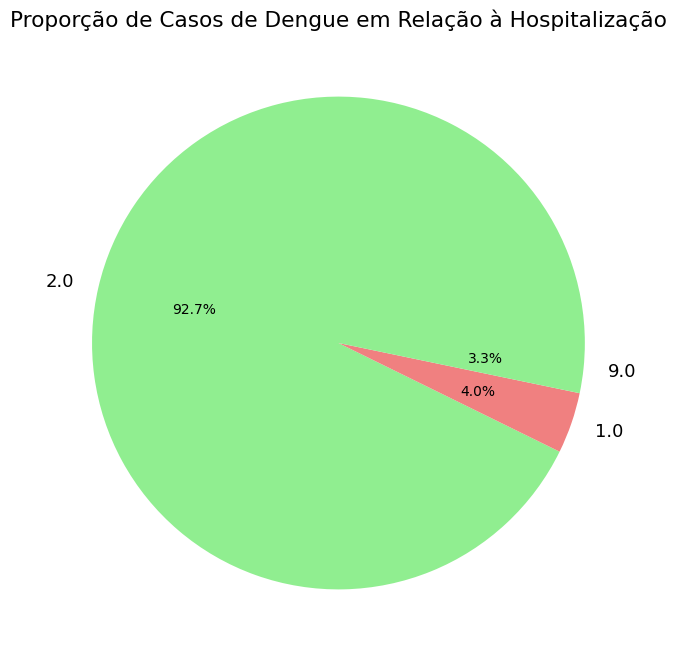

In [26]:
plt.figure(figsize=(8, 8))
dados_final['Hospitalização'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Proporção de Casos de Dengue em Relação à Hospitalização')
plt.ylabel('')
plt.show()


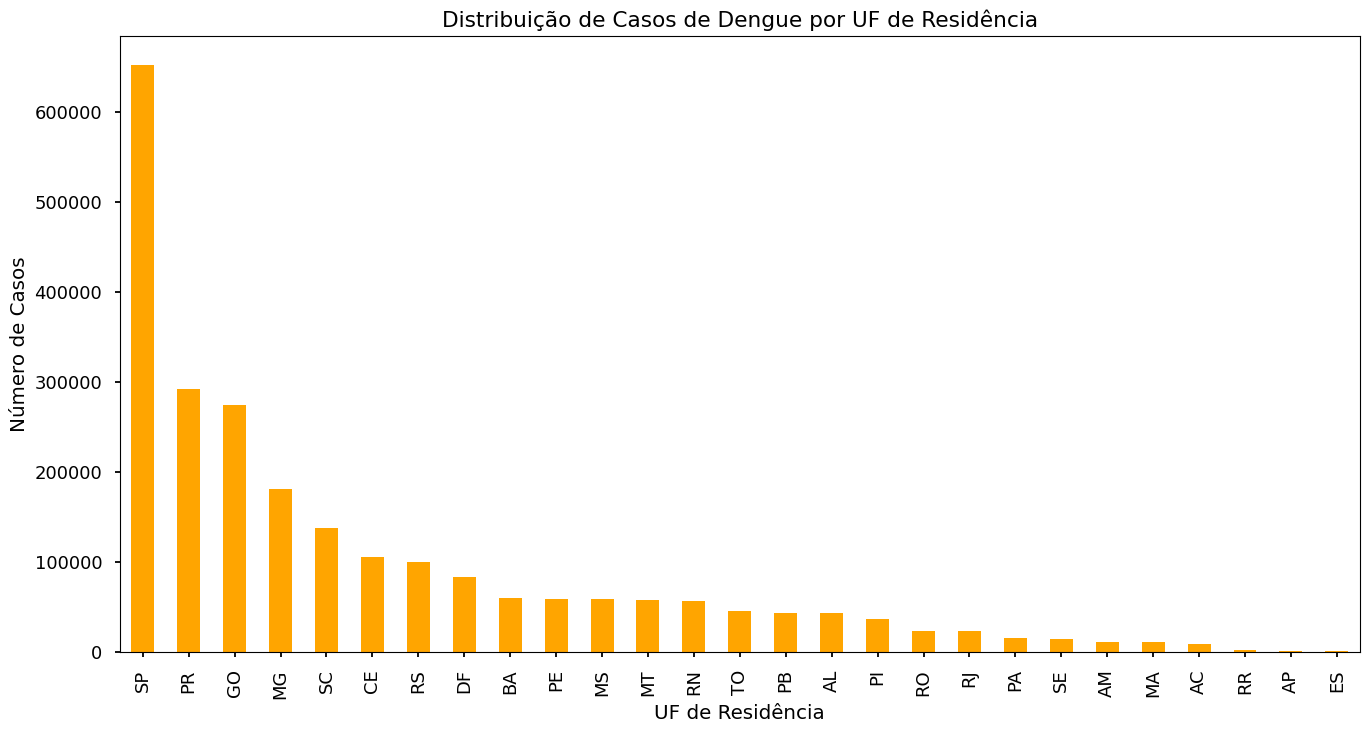

In [32]:
plt.figure(figsize=(16, 8))
dados_final['Nome da UF'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribuição de Casos de Dengue por UF de Residência')
plt.xlabel('UF de Residência')
plt.ylabel('Número de Casos')
plt.show()


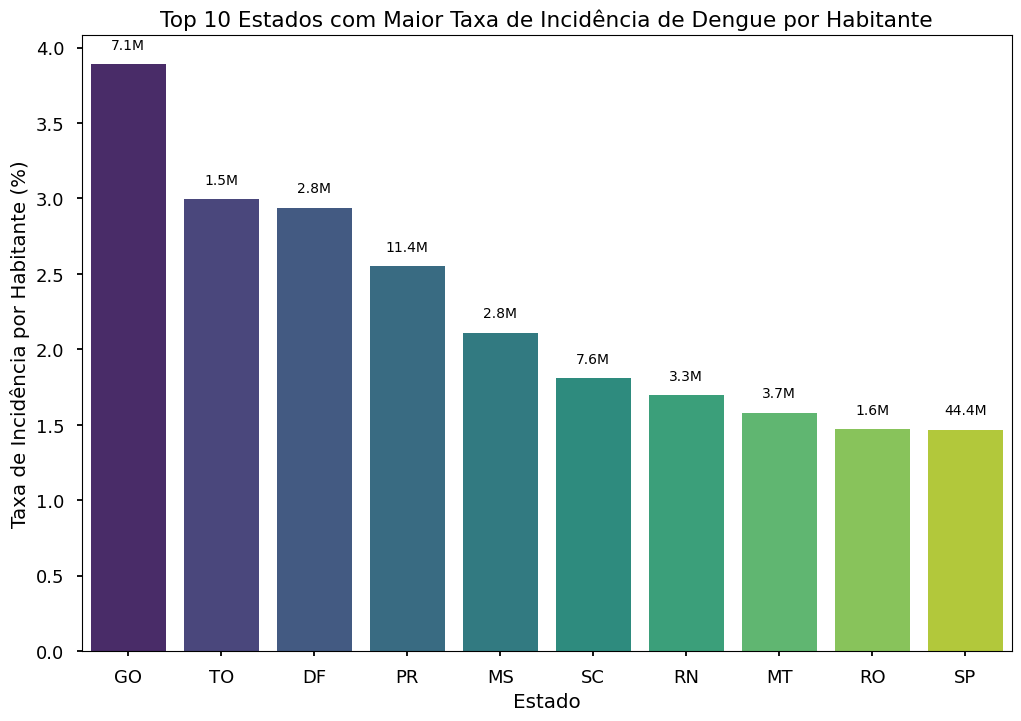

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados da população por estado
populacao_por_estado = {
    'SP': 44420459, 'MG': 20538718, 'RJ': 16054524, 'BA': 14136417, 'PR': 11443208,
    'RS': 10880506, 'PE': 9058155, 'CE': 8791688, 'PA': 8116132, 'SC': 7609601,
    'GO': 7055228, 'MA': 6775152, 'PB': 3974495, 'AM': 3941175, 'ES': 3833486,
    'MT': 3658813, 'RN': 3302406, 'PI': 3269200, 'AL': 3127511, 'DF': 2817068,
    'MS': 2756700, 'SE': 2209558, 'RO': 1581016, 'TO': 1511459, 'AC': 830026,
    'AP': 733508, 'RR': 636303
}

# Adicione a população ao DataFrame
dados_final['Populacao'] = dados_final['Nome da UF'].map(populacao_por_estado)

# Calcule a contagem de casos por estado
contagem_casos = dados_final['Nome da UF'].value_counts()

# Calcule a taxa de incidência por habitante
dados_final['Quantidade de Casos'] = dados_final['Nome da UF'].map(contagem_casos)
dados_final['Taxa por Habitante'] = (dados_final['Quantidade de Casos'] / dados_final['Populacao']) * 100

# Selecione apenas as colunas relevantes para o cálculo
dados_estado_presente = dados_final[['Nome da UF', 'Populacao', 'Quantidade de Casos', 'Taxa por Habitante']]

# Ordenar os estados pela taxa de incidência e selecionar os 10 maiores
top_10_estados = dados_estado_presente.groupby('Nome da UF')['Taxa por Habitante'].max().nlargest(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_estados.index, y=top_10_estados.values, palette='viridis')
plt.title('Top 10 Estados com Maior Taxa de Incidência de Dengue por Habitante')
plt.xlabel('Estado')
plt.ylabel('Taxa de Incidência por Habitante (%)')

# Adicionar a quantidade de habitantes no topo das barras
for i, valor in enumerate(top_10_estados.values):
    plt.text(i, valor + 0.1, f'{populacao_por_estado[top_10_estados.index[i]] / 1e6:.1f}M', ha='center')

plt.show()


<Figure size 1400x800 with 0 Axes>

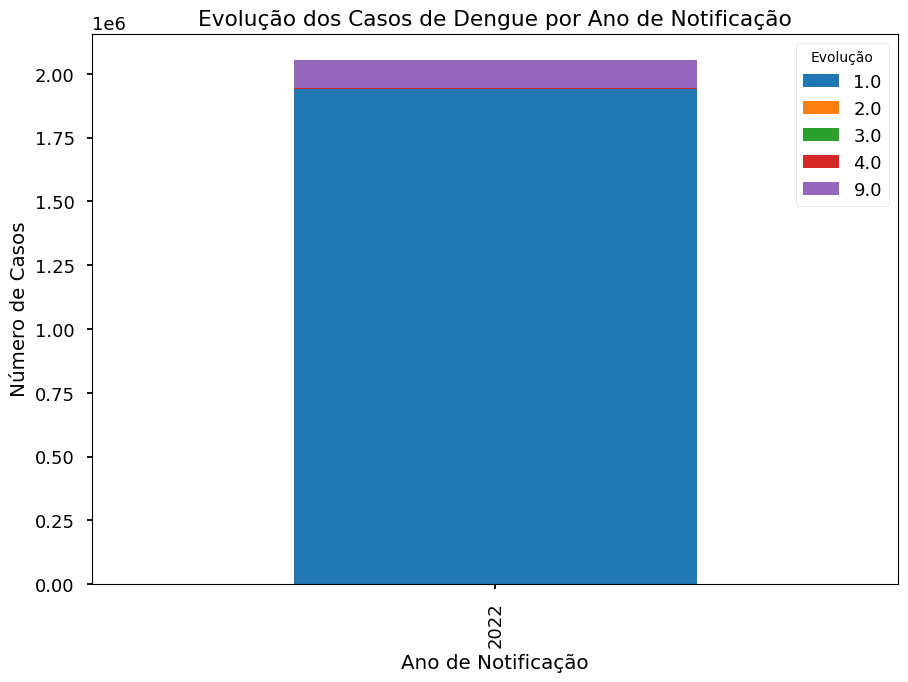

In [28]:
plt.figure(figsize=(14, 8))
dados_final.groupby(['Ano de Notificação', 'Evolução'])['Classificação Final'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Evolução dos Casos de Dengue por Ano de Notificação')
plt.xlabel('Ano de Notificação')
plt.ylabel('Número de Casos')
plt.legend(title='Evolução', bbox_to_anchor=(1, 1))
plt.show()


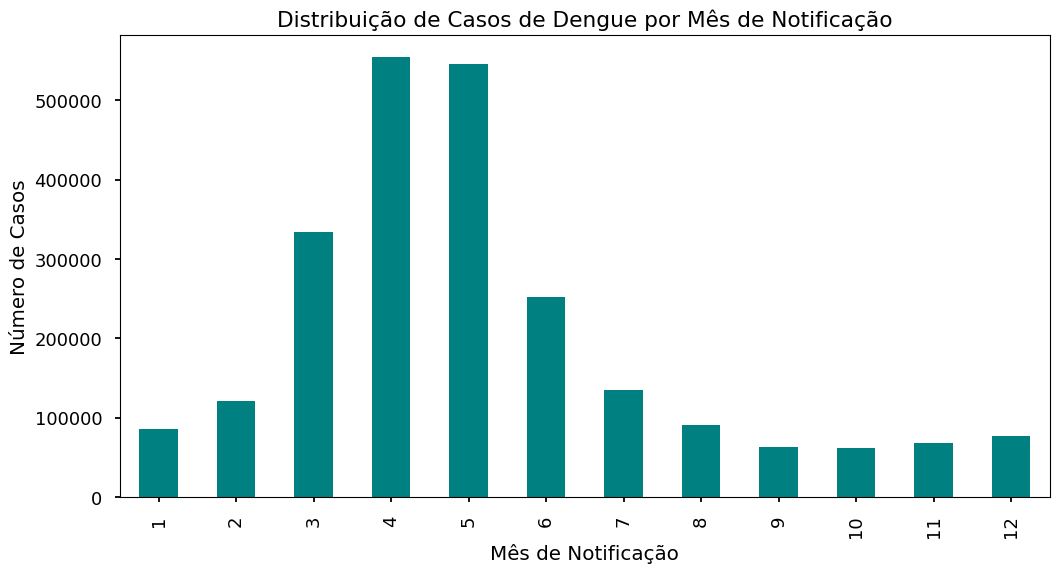

In [29]:
dados_final['Mes_Notificacao'] = pd.to_datetime(dados_final['Data de Notificação']).dt.month
plt.figure(figsize=(12, 6))
dados_final['Mes_Notificacao'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Distribuição de Casos de Dengue por Mês de Notificação')
plt.xlabel('Mês de Notificação')
plt.ylabel('Número de Casos')
plt.show()


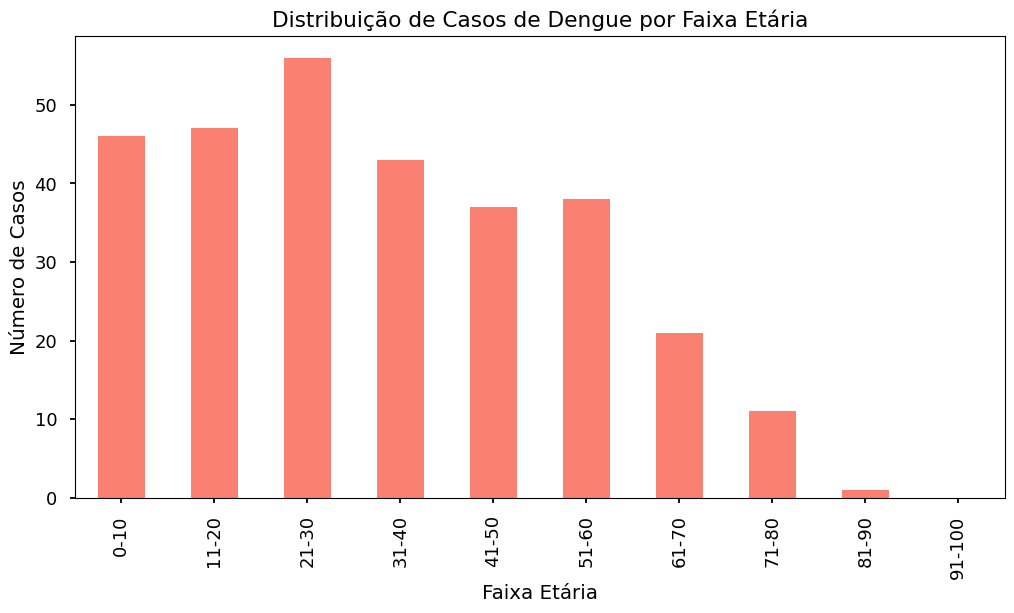

In [30]:
faixa_etaria_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
faixa_etaria_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
dados_final['Faixa Etária'] = pd.cut(dados_final['Idade'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)
plt.figure(figsize=(12, 6))
dados_final['Faixa Etária'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribuição de Casos de Dengue por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Casos')
plt.show()

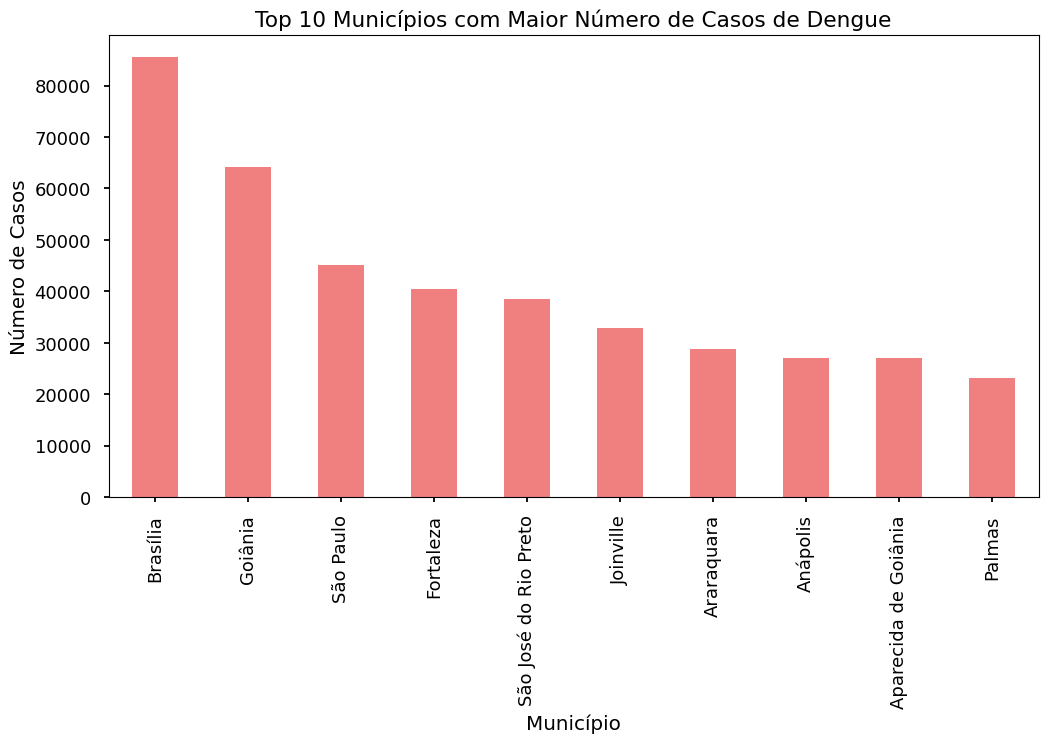

In [31]:
top_municipios = dados_final['Nome do Município de Notificação'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_municipios.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Municípios com Maior Número de Casos de Dengue')
plt.xlabel('Município')
plt.ylabel('Número de Casos')
plt.show()